In [1]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )
1)  Alcohol

2)  Malic acid

3)  Ash

4)  Alcalinity of ash

5)  Magnesium

6)  Total phenols

7)  Flavanoids

8)  Nonflavanoid phenols

9)  Proanthocyanins

10) Color intensity

11) Hue

12) OD280/OD315 of diluted wines

13) Proline

In [2]:
columns = ['wine Type',
           'Alcohol',
           'Malic acid',
           'Ash',
           'Alcalinity of ash',
           'Magnesium',
           'Total phenols',
           'Flavanoids',
           'Nonflavanoid phenols',
           'Proanthocyanins',
           'Color intensity',
           'Hue',
           'OD280/OD315 of diluted wines',
           'Proline']


data = pd.read_csv('data/wine.data', sep=',')
data.columns = columns
data.head(5)

,wine Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
data.describe()

,wine Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wine Type                     177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

# Data analisys

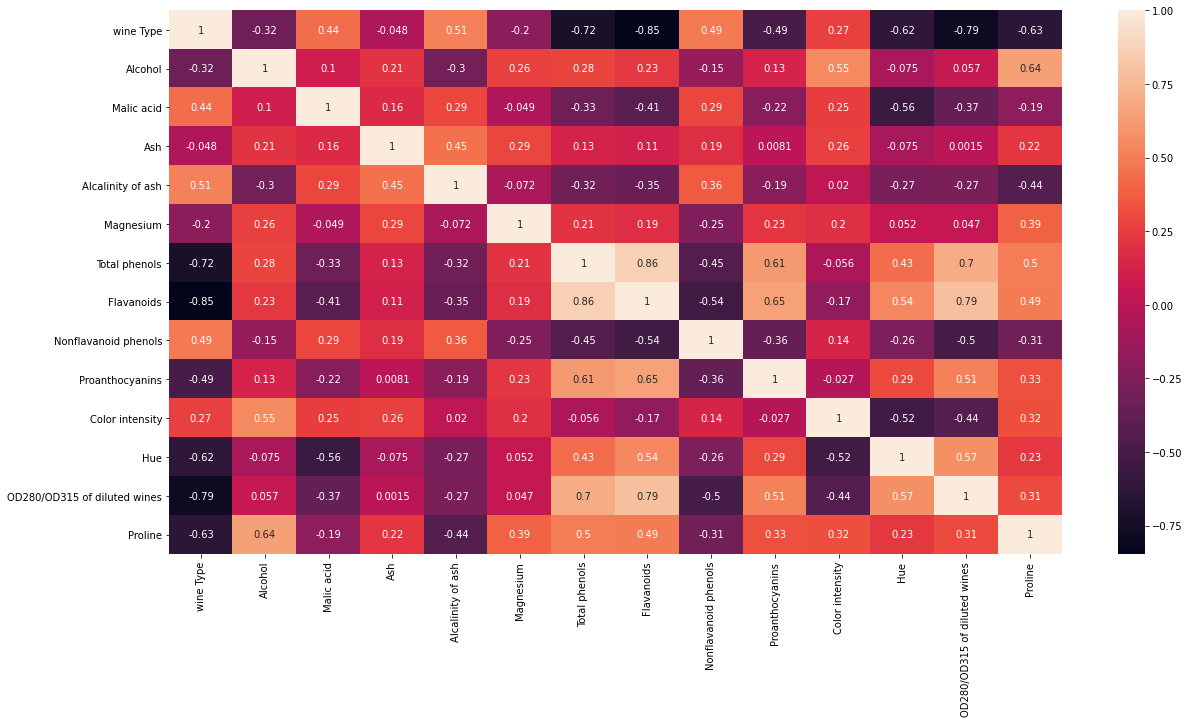

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True);

In [6]:
dataValuable = []
dataCorr     = data.corr().to_numpy()[0][1:]
aux          = dataCorr > -5
_columns = columns[1:]

print('Valuable Data to model:')
for i in range(13):
    if aux[i]:
        print('{:25}\t{:.3f} %'.format(_columns[i], 100*dataCorr[i]))
        dataValuable.append(_columns[i])
        
del aux, dataCorr


dataLabel    = data[columns[0]]
dataValuable = data[columns[1:]]

print('-'*40)

print('{:30}\t{}'.format('Data label array shape:',dataLabel.shape))
print('{:30}\t{}'.format('Valuable Data array shape:',dataValuable.shape))


Valuable Data to model:
Alcohol                  	-32.124 %
Malic acid               	43.613 %
Ash                      	-4.826 %
Alcalinity of ash        	51.396 %
Magnesium                	-19.894 %
Total phenols            	-71.793 %
Flavanoids               	-84.649 %
Nonflavanoid phenols     	48.721 %
Proanthocyanins          	-49.489 %
Color intensity          	26.856 %
Hue                      	-61.769 %
OD280/OD315 of diluted wines	-78.643 %
Proline                  	-63.123 %
----------------------------------------
Data label array shape:       	(177,)
Valuable Data array shape:    	(177, 13)


In [7]:
print('index of wine 1:[:{}]'.format(np.count_nonzero(dataLabel.to_numpy() == 1)))
print('index of wine 2:[{}:{}]'.format(np.count_nonzero(dataLabel.to_numpy() == 1),np.count_nonzero(dataLabel.to_numpy() == 1)+np.count_nonzero(dataLabel.to_numpy() == 2) ))
print('index of wine 3:[{}:]'.format(np.count_nonzero(dataLabel.to_numpy() == 1)+np.count_nonzero(dataLabel.to_numpy() == 2)))

index of wine 1:[:58]
index of wine 2:[58:129]
index of wine 3:[129:]


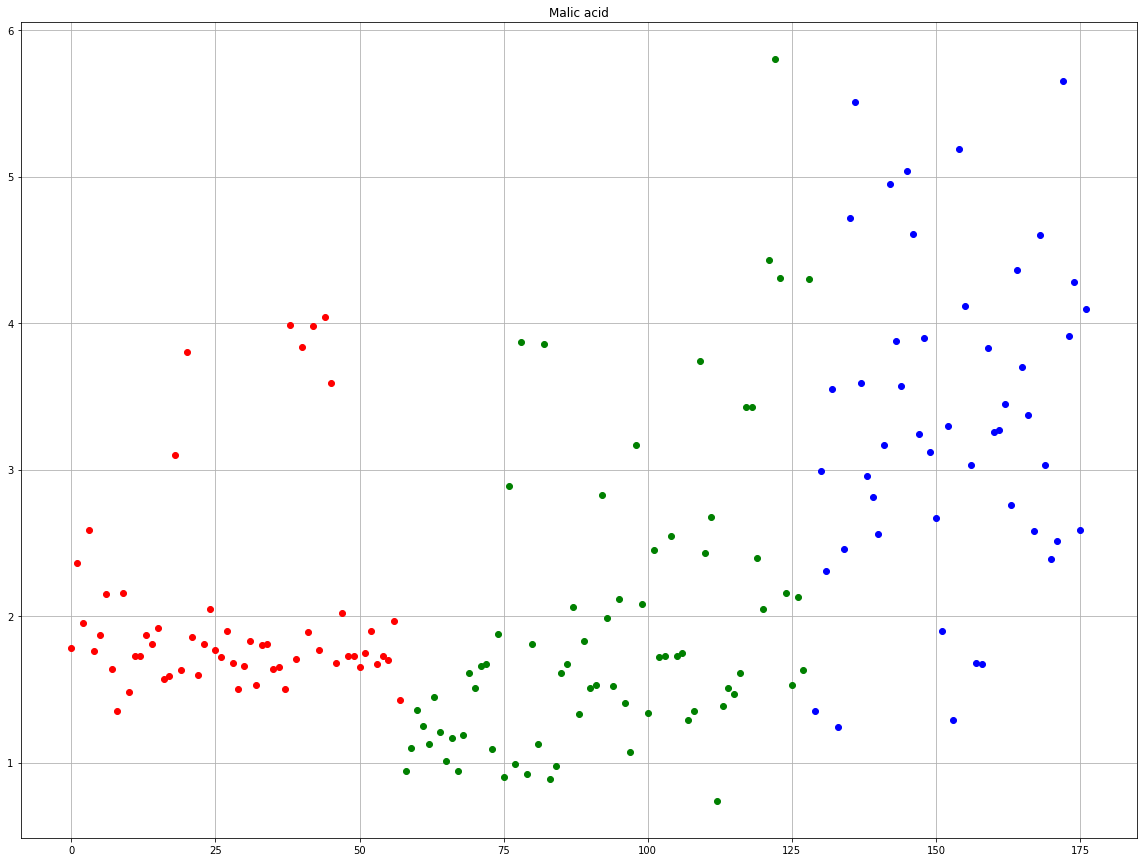

In [8]:
plt.figure(figsize=(20,15))
x = list(range(dataLabel.shape[0]))
y = dataValuable['Malic acid'].to_numpy()
plt.title('Malic acid')

plt.plot(x[:58],y[:58],'or' ) #wine 1
plt.plot(x[58:129],y[58:129],'og' ) #wine 2
plt.plot(x[129:],y[129:],'ob' ) #wine 3


plt.grid()

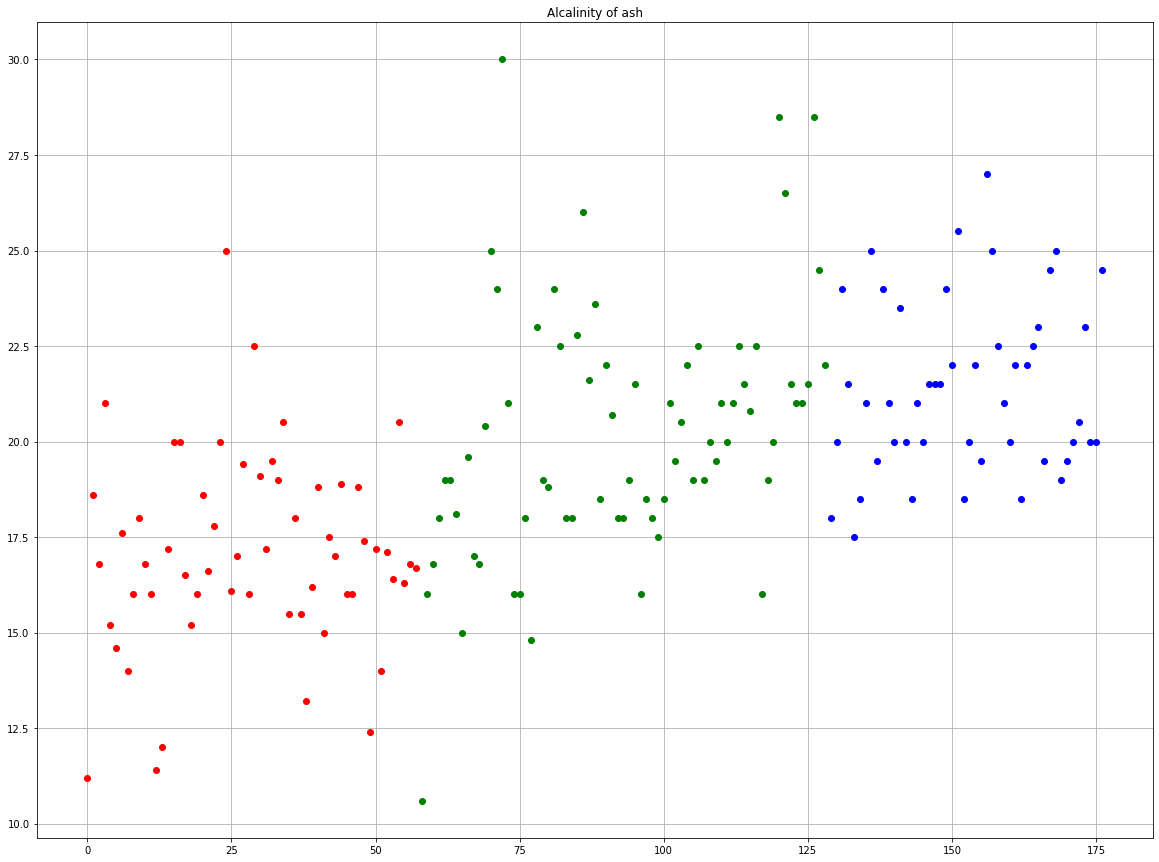

In [9]:
plt.figure(figsize=(20,15))
x = list(range(dataLabel.shape[0]))
y = dataValuable['Alcalinity of ash'].to_numpy()
plt.title('Alcalinity of ash')

plt.plot(x[:58],y[:58],'or' ) #wine 1
plt.plot(x[58:129],y[58:129],'og' ) #wine 2
plt.plot(x[129:],y[129:],'ob' ) #wine 3

plt.grid()

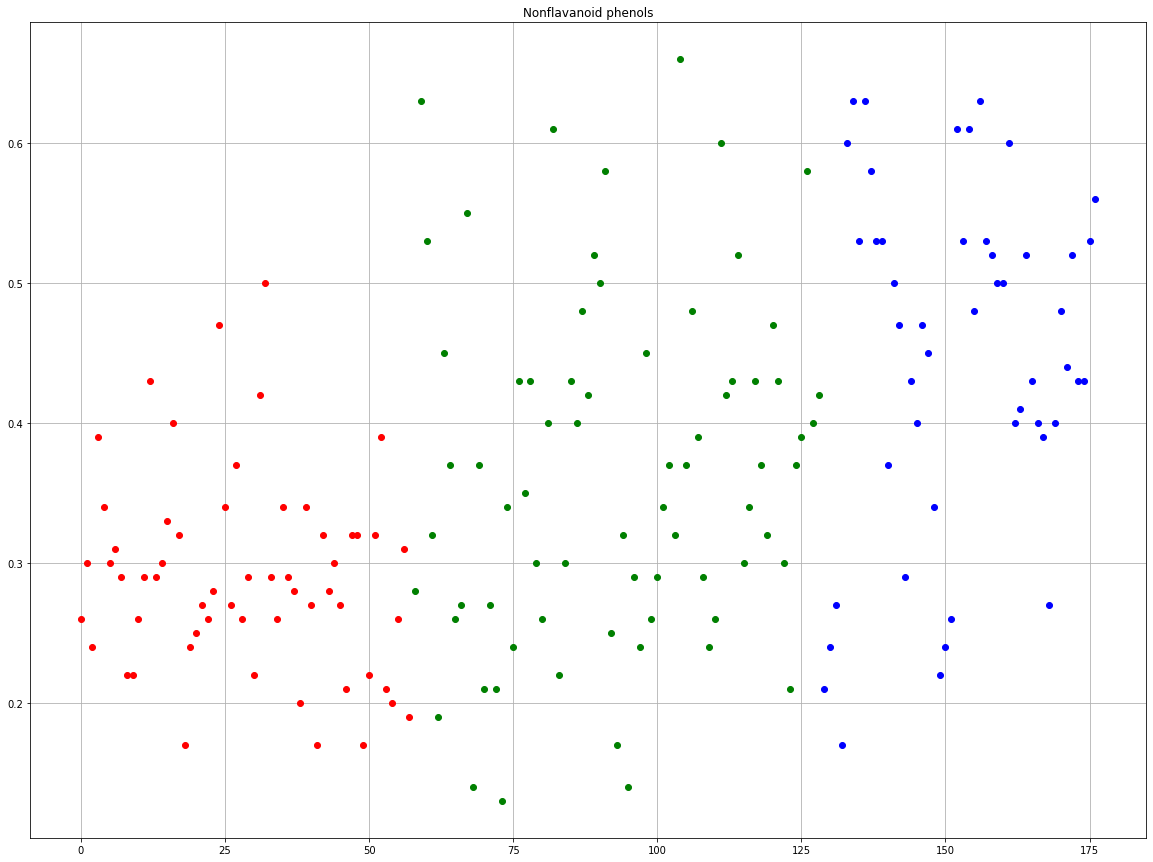

In [10]:
plt.figure(figsize=(20,15))
x = list(range(dataLabel.shape[0]))
y = dataValuable['Nonflavanoid phenols'].to_numpy()
plt.title('Nonflavanoid phenols')

plt.plot(x[:58],y[:58],'or' ) #wine 1
plt.plot(x[58:129],y[58:129],'og' ) #wine 2
plt.plot(x[129:],y[129:],'ob' ) #wine 3

plt.grid()

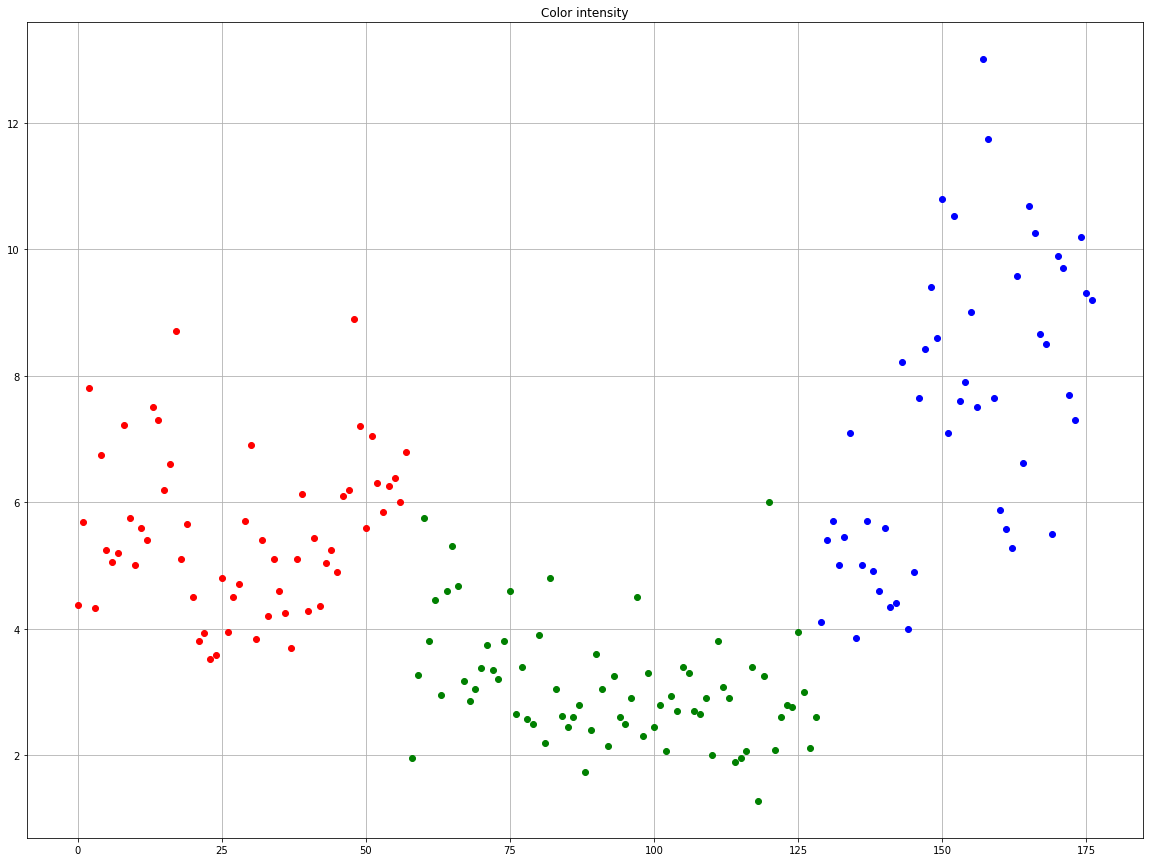

In [11]:
plt.figure(figsize=(20,15))
x = list(range(dataLabel.shape[0]))
y = dataValuable['Color intensity'].to_numpy()
plt.title('Color intensity')

plt.plot(x[:58],y[:58],'or' ) #wine 1
plt.plot(x[58:129],y[58:129],'og' ) #wine 2
plt.plot(x[129:],y[129:],'ob' ) #wine 3

plt.grid()

# model construction

In [12]:
dataLabel    = dataLabel.to_numpy() - 1
dataLabel = tf.keras.utils.to_categorical(dataLabel, 3)
dataValuable = data.to_numpy()

print('{:30}\t{}'.format('Data label array shape:',dataLabel.shape))
print('{:30}\t{}'.format('Valuable Data array shape:',dataValuable.shape))

Data label array shape:       	(177, 3)
Valuable Data array shape:    	(177, 14)


In [13]:

from sklearn.model_selection import train_test_split



dataValuableTrain, dataValuableTest, dataLabelTrain ,dataLabelTest = train_test_split(dataValuable, 
                                                                                      dataLabel,
                                                                                      test_size=0.2,
                                                                                      random_state=5)

nEpochs       = 500
percentSplit  = 0.2


# Model construction

In [14]:
modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Dense( units = 100, activation = 'tanh', input_shape = (14,) ))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense( units = 100, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense( units = 100, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.2))
modelo.add(tf.keras.layers.Dense( units = 100, activation = 'tanh' ))
modelo.add(tf.keras.layers.Dropout(0.1))
modelo.add(tf.keras.layers.Dense( units = 3  , activation = 'softmax' ))
modelo.compile(optimizer = 'Adamax' , 
               loss='CategoricalCrossentropy',
               metrics=['CategoricalAccuracy'])

hist = modelo.fit(dataValuableTrain,
                  dataLabelTrain,
                  epochs = nEpochs,
                  batch_size = 10,
                  validation_split = percentSplit,
                  verbose =2)

Epoch 1/500
12/12 - 7s - loss: 0.9573 - categorical_accuracy: 0.5357 - val_loss: 0.8279 - val_categorical_accuracy: 0.5862
Epoch 2/500
12/12 - 1s - loss: 0.8556 - categorical_accuracy: 0.5893 - val_loss: 0.7233 - val_categorical_accuracy: 0.7241
Epoch 3/500
12/12 - 0s - loss: 0.7753 - categorical_accuracy: 0.5982 - val_loss: 0.6024 - val_categorical_accuracy: 0.7586
Epoch 4/500
12/12 - 1s - loss: 0.7708 - categorical_accuracy: 0.6161 - val_loss: 0.6218 - val_categorical_accuracy: 0.7586
Epoch 5/500
12/12 - 1s - loss: 0.6812 - categorical_accuracy: 0.6518 - val_loss: 0.5657 - val_categorical_accuracy: 0.6897
Epoch 6/500
12/12 - 1s - loss: 0.7597 - categorical_accuracy: 0.6161 - val_loss: 0.5885 - val_categorical_accuracy: 0.6552
Epoch 7/500
12/12 - 1s - loss: 0.6822 - categorical_accuracy: 0.6786 - val_loss: 0.5748 - val_categorical_accuracy: 0.7241
Epoch 8/500
12/12 - 1s - loss: 0.6575 - categorical_accuracy: 0.6250 - val_loss: 0.6207 - val_categorical_accuracy: 0.7586
Epoch 9/500
12/1

Epoch 68/500
12/12 - 1s - loss: 0.4452 - categorical_accuracy: 0.8304 - val_loss: 0.4237 - val_categorical_accuracy: 0.8276
Epoch 69/500
12/12 - 0s - loss: 0.4138 - categorical_accuracy: 0.8125 - val_loss: 0.3814 - val_categorical_accuracy: 0.8621
Epoch 70/500
12/12 - 1s - loss: 0.4827 - categorical_accuracy: 0.8036 - val_loss: 0.4790 - val_categorical_accuracy: 0.8276
Epoch 71/500
12/12 - 1s - loss: 0.5035 - categorical_accuracy: 0.7946 - val_loss: 0.4397 - val_categorical_accuracy: 0.8276
Epoch 72/500
12/12 - 1s - loss: 0.4837 - categorical_accuracy: 0.8214 - val_loss: 0.3454 - val_categorical_accuracy: 0.8621
Epoch 73/500
12/12 - 1s - loss: 0.4469 - categorical_accuracy: 0.8482 - val_loss: 0.4421 - val_categorical_accuracy: 0.8276
Epoch 74/500
12/12 - 1s - loss: 0.4811 - categorical_accuracy: 0.8125 - val_loss: 0.4491 - val_categorical_accuracy: 0.8276
Epoch 75/500
12/12 - 1s - loss: 0.4613 - categorical_accuracy: 0.7946 - val_loss: 0.3622 - val_categorical_accuracy: 0.8966
Epoch 76

Epoch 134/500
12/12 - 1s - loss: 0.2625 - categorical_accuracy: 0.9196 - val_loss: 0.2506 - val_categorical_accuracy: 0.9310
Epoch 135/500
12/12 - 1s - loss: 0.2807 - categorical_accuracy: 0.9018 - val_loss: 0.2573 - val_categorical_accuracy: 0.9310
Epoch 136/500
12/12 - 1s - loss: 0.3104 - categorical_accuracy: 0.8839 - val_loss: 0.2696 - val_categorical_accuracy: 0.9310
Epoch 137/500
12/12 - 1s - loss: 0.2678 - categorical_accuracy: 0.8929 - val_loss: 0.2830 - val_categorical_accuracy: 0.8966
Epoch 138/500
12/12 - 1s - loss: 0.3403 - categorical_accuracy: 0.8839 - val_loss: 0.2537 - val_categorical_accuracy: 0.9310
Epoch 139/500
12/12 - 1s - loss: 0.3766 - categorical_accuracy: 0.8750 - val_loss: 0.2337 - val_categorical_accuracy: 0.9310
Epoch 140/500
12/12 - 1s - loss: 0.3233 - categorical_accuracy: 0.8929 - val_loss: 0.2131 - val_categorical_accuracy: 0.9655
Epoch 141/500
12/12 - 0s - loss: 0.3210 - categorical_accuracy: 0.8750 - val_loss: 0.2139 - val_categorical_accuracy: 0.9310


Epoch 200/500
12/12 - 1s - loss: 0.2892 - categorical_accuracy: 0.8750 - val_loss: 0.3360 - val_categorical_accuracy: 0.8966
Epoch 201/500
12/12 - 1s - loss: 0.2609 - categorical_accuracy: 0.9018 - val_loss: 0.3372 - val_categorical_accuracy: 0.8966
Epoch 202/500
12/12 - 0s - loss: 0.3004 - categorical_accuracy: 0.8750 - val_loss: 0.3009 - val_categorical_accuracy: 0.9310
Epoch 203/500
12/12 - 1s - loss: 0.2735 - categorical_accuracy: 0.9018 - val_loss: 0.2975 - val_categorical_accuracy: 0.9310
Epoch 204/500
12/12 - 1s - loss: 0.3315 - categorical_accuracy: 0.8571 - val_loss: 0.2681 - val_categorical_accuracy: 0.9310
Epoch 205/500
12/12 - 1s - loss: 0.2996 - categorical_accuracy: 0.8839 - val_loss: 0.3019 - val_categorical_accuracy: 0.8966
Epoch 206/500
12/12 - 1s - loss: 0.2437 - categorical_accuracy: 0.9107 - val_loss: 0.3383 - val_categorical_accuracy: 0.8966
Epoch 207/500
12/12 - 1s - loss: 0.2350 - categorical_accuracy: 0.9018 - val_loss: 0.3089 - val_categorical_accuracy: 0.9310


Epoch 266/500
12/12 - 1s - loss: 0.2702 - categorical_accuracy: 0.8839 - val_loss: 0.3383 - val_categorical_accuracy: 0.9310
Epoch 267/500
12/12 - 1s - loss: 0.2042 - categorical_accuracy: 0.9286 - val_loss: 0.3313 - val_categorical_accuracy: 0.9310
Epoch 268/500
12/12 - 1s - loss: 0.2612 - categorical_accuracy: 0.9375 - val_loss: 0.3603 - val_categorical_accuracy: 0.8966
Epoch 269/500
12/12 - 1s - loss: 0.2014 - categorical_accuracy: 0.9554 - val_loss: 0.3651 - val_categorical_accuracy: 0.9310
Epoch 270/500
12/12 - 0s - loss: 0.2262 - categorical_accuracy: 0.9196 - val_loss: 0.3399 - val_categorical_accuracy: 0.8966
Epoch 271/500
12/12 - 1s - loss: 0.2511 - categorical_accuracy: 0.8929 - val_loss: 0.3428 - val_categorical_accuracy: 0.8966
Epoch 272/500
12/12 - 1s - loss: 0.2471 - categorical_accuracy: 0.9107 - val_loss: 0.3784 - val_categorical_accuracy: 0.8621
Epoch 273/500
12/12 - 0s - loss: 0.2094 - categorical_accuracy: 0.9107 - val_loss: 0.3713 - val_categorical_accuracy: 0.8966


Epoch 332/500
12/12 - 1s - loss: 0.1644 - categorical_accuracy: 0.9196 - val_loss: 0.3469 - val_categorical_accuracy: 0.9310
Epoch 333/500
12/12 - 1s - loss: 0.1962 - categorical_accuracy: 0.9107 - val_loss: 0.3257 - val_categorical_accuracy: 0.9310
Epoch 334/500
12/12 - 0s - loss: 0.2003 - categorical_accuracy: 0.9196 - val_loss: 0.3469 - val_categorical_accuracy: 0.9310
Epoch 335/500
12/12 - 1s - loss: 0.1881 - categorical_accuracy: 0.9107 - val_loss: 0.3895 - val_categorical_accuracy: 0.9310
Epoch 336/500
12/12 - 1s - loss: 0.2273 - categorical_accuracy: 0.9107 - val_loss: 0.3213 - val_categorical_accuracy: 0.9310
Epoch 337/500
12/12 - 1s - loss: 0.2023 - categorical_accuracy: 0.9375 - val_loss: 0.3046 - val_categorical_accuracy: 0.9310
Epoch 338/500
12/12 - 1s - loss: 0.2523 - categorical_accuracy: 0.8839 - val_loss: 0.2695 - val_categorical_accuracy: 0.9310
Epoch 339/500
12/12 - 1s - loss: 0.2485 - categorical_accuracy: 0.9196 - val_loss: 0.2918 - val_categorical_accuracy: 0.9310


Epoch 398/500
12/12 - 1s - loss: 0.2562 - categorical_accuracy: 0.8661 - val_loss: 0.3992 - val_categorical_accuracy: 0.8966
Epoch 399/500
12/12 - 1s - loss: 0.1520 - categorical_accuracy: 0.9375 - val_loss: 0.4104 - val_categorical_accuracy: 0.8621
Epoch 400/500
12/12 - 1s - loss: 0.2329 - categorical_accuracy: 0.8839 - val_loss: 0.3396 - val_categorical_accuracy: 0.9310
Epoch 401/500
12/12 - 1s - loss: 0.2474 - categorical_accuracy: 0.8929 - val_loss: 0.4192 - val_categorical_accuracy: 0.9310
Epoch 402/500
12/12 - 1s - loss: 0.2552 - categorical_accuracy: 0.9107 - val_loss: 0.4690 - val_categorical_accuracy: 0.8966
Epoch 403/500
12/12 - 0s - loss: 0.1644 - categorical_accuracy: 0.9464 - val_loss: 0.3981 - val_categorical_accuracy: 0.9310
Epoch 404/500
12/12 - 0s - loss: 0.1857 - categorical_accuracy: 0.9375 - val_loss: 0.3423 - val_categorical_accuracy: 0.9310
Epoch 405/500
12/12 - 0s - loss: 0.1765 - categorical_accuracy: 0.9286 - val_loss: 0.4354 - val_categorical_accuracy: 0.8966


Epoch 464/500
12/12 - 1s - loss: 0.1446 - categorical_accuracy: 0.9286 - val_loss: 0.3441 - val_categorical_accuracy: 0.9310
Epoch 465/500
12/12 - 1s - loss: 0.1372 - categorical_accuracy: 0.9643 - val_loss: 0.3459 - val_categorical_accuracy: 0.9310
Epoch 466/500
12/12 - 1s - loss: 0.1519 - categorical_accuracy: 0.9196 - val_loss: 0.3327 - val_categorical_accuracy: 0.8966
Epoch 467/500
12/12 - 1s - loss: 0.1575 - categorical_accuracy: 0.9464 - val_loss: 0.3774 - val_categorical_accuracy: 0.9310
Epoch 468/500
12/12 - 1s - loss: 0.1710 - categorical_accuracy: 0.9464 - val_loss: 0.3871 - val_categorical_accuracy: 0.9310
Epoch 469/500
12/12 - 1s - loss: 0.1449 - categorical_accuracy: 0.9375 - val_loss: 0.3606 - val_categorical_accuracy: 0.9310
Epoch 470/500
12/12 - 1s - loss: 0.1640 - categorical_accuracy: 0.9464 - val_loss: 0.3130 - val_categorical_accuracy: 0.9310
Epoch 471/500
12/12 - 1s - loss: 0.1498 - categorical_accuracy: 0.9643 - val_loss: 0.3765 - val_categorical_accuracy: 0.9310


# model evaluate

In [15]:
"""
score = modelo.evaluate(dataValuableTest, dataLabelTest, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])"""

"\nscore = modelo.evaluate(dataValuableTest, dataLabelTest, verbose = 0) \n\nprint('Test loss:', score[0]) \nprint('Test accuracy:', score[1])"

In [16]:
from sklearn.metrics import r2_score
r2_score(dataLabelTest, modelo.predict(dataValuableTest))

0.9348074251054297

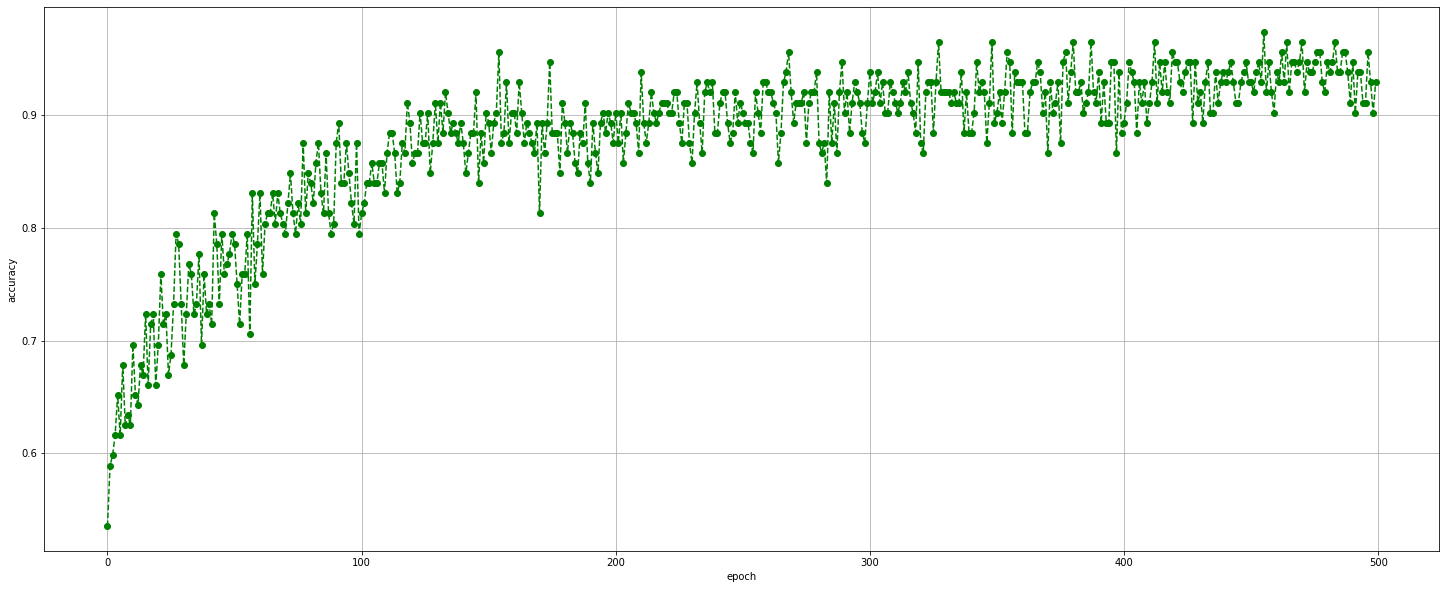

In [17]:
plt.figure(figsize=(25,10))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['categorical_accuracy'], 'o', color='green')
plt.plot(hist.history['categorical_accuracy'], '--', color='green')
plt.grid()

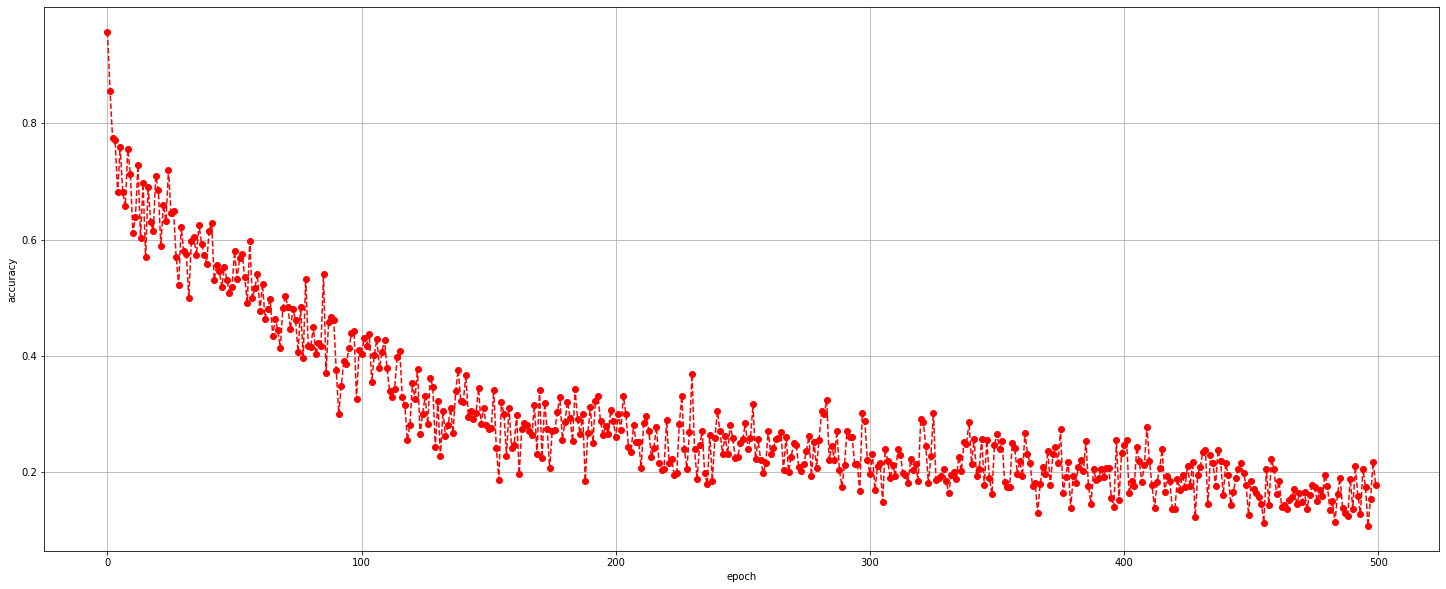

In [18]:
plt.figure(figsize=(25,10))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['loss'], 'o', color='red')
plt.plot(hist.history['loss'], '--', color='red')
plt.grid()

In [19]:
prediction =  modelo.predict(dataValuableTest)
filtredPrediction=[]
p = np.around(prediction, decimals=0)
print('{:25}:{:.2f}'.format('Predictions R2', r2_score(prediction,dataLabelTest)))
print('{:25}:{:.2f}'.format('Rounded predictions R2', r2_score(p,dataLabelTest)))

Predictions R2           :0.93
Rounded predictions R2   :0.92
